# 共享单车预测

[作业要求及数据介绍](https://edu.csdn.net/teach_task/detail/37/188);

数据探索见homework_data_explore.jpynb.

## 1. 引入必要工具包

In [9]:
# 需要矩阵操作工具包numpy/SQL处理包panda
import numpy as np
import pandas as pd

# 图表
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # 数据分割

from sklearn.metrics import mean_squared_error # 性能评估均值差

from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder

from scipy.sparse import hstack


%matplotlib inline


## 2.预处理数据集

### 2.1 读取数据

In [25]:
data = pd.read_csv('../dataset/day.csv')

### 2.2 数据准备

### 2.3　数据预处理

### 将数据随机分成训练集和测试集

In [26]:
# 目标值y
y = data['cnt']

# 
X = data.drop(['dteday', 'instant', 'casual', 'registered', 'cnt'], axis=1)

# 将数据以8:2随机分成训练集和测试集z
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征名称,用来显示权重系数
feat_names = X.columns

In [27]:
# 训练集独热编码
Ohe = OneHotEncoder()

train_cat = Ohe.fit_transform(X_train[['season','mnth','holiday','weekday','workingday']])

train_num = X_train[['temp', 'atemp', 'hum', 'windspeed']]

x_train = hstack((train_cat, train_num))

In [28]:
# 测试集独热编码
test_cat = Ohe.fit_transform(X_test[['season','mnth','holiday','weekday','workingday']])

test_num = X_test[['temp', 'atemp', 'hum', 'windspeed']]

x_test = hstack((test_cat, test_num))

In [29]:
# 对目标Y做标准化处理
ss_y = StandardScaler()

# 训练集拟合和标准化
y_train = ss_y.fit_transform(y_train.values.reshape(-1,1))

# 测试集标准化
y_test = ss_y.fit_transform(y_test.values.reshape(-1,1))


/home/wyb/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/wyb/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/wyb/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/wyb/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## 3. 确定模型类型

### 3.1 用最小二乘线性回归模型

#### 3.1.1 训练模型

In [30]:
from sklearn.linear_model import LinearRegression
# 1.使用默认配置实例化学习器
lr = LinearRegression()

# 2.用训练数据训练模型
lr.fit(X_train, y_train)

# 3. 用训练好的模型预测测试集
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)



In [31]:
# 查看各特征权重系数
fs = pd.DataFrame({"columns":list(feat_names), "coef":list((lr.coef_.T))})
fs.sort_values(by=['coef'], ascending=False)

,coef,columns
8,[1.8218103980297742],atemp
7,[1.0953961328451685],temp
1,[1.0571373814753298],yr
0,[0.2740634785017926],season
5,[0.08398867028248],workingday
4,[0.038095121226875944],weekday
2,[-0.02007971063705072],mnth
3,[-0.20450763512610512],holiday
6,[-0.3305419196370914],weathersit
9,[-0.4520204893064499],hum


#### 3.1.2 评价模型

In [32]:
# 使用RMSE评价
print "The RMSE score of LR on train is", np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
print "The RMSE score of LR on test is", np.sqrt(mean_squared_error(y_test, y_test_pred_lr))


The RMSE score of LR on train is 0.4570720019355936
The RMSE score of LR on test is 0.4372160222631778


#### 3.1.3 观察预测参差分布

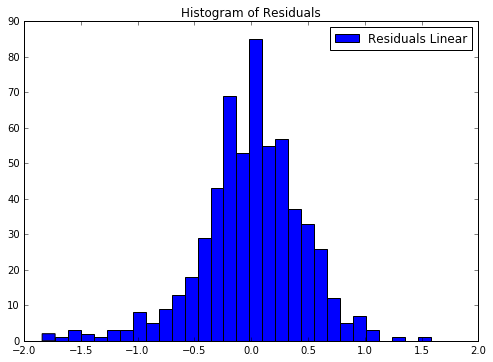

In [33]:
f, ax = plt.subplots(figsize=(7,5))
f.tight_layout()
ax.hist(y_train - y_train_pred_lr, bins=30, label="Residuals Linear")
ax.set_title("Histogram of Residuals")
ax.legend(loc='best')

### 3.2 用岭回归模型

### 3.3 用Lasso回归模型